**Breast Cancer Detection**
![](https://blogs.nvidia.com/wp-content/uploads/2018/01/AI_Mammographie.jpg)

***Domain Background*** : 
	Breast Cancer is the most common type of cancer in woman worldwide accounting for 20% of all cases.
    
>     In 2012 it resulted in 1.68 million new cases and 522,000 deaths.
    
One of the major problems is that women often neglect the symptoms, which could cause more adverse effects on them thus lowering the survival chances. In developed countries, the survival rate is although high, but it is an area of concern in the developing countries where the 5-year survival rates are poor. In India, there are about one million cases every year and the five-year survival of stage IV breast cancer is about 10%. Therefore it is very important to detect the signs as early as possible. 
    
>     Invasive ductal carcinoma (IDC) is the most common form of breast cancer.
   
   About 80% of all breast cancers are invasive ductal carcinomas. Doctors often do the biopsy or a scan if they detect signs of IDC. The cost of testing for breast cancer sets one back with $5000, which is a very big amount for poor families and also manual identification of presence and extent of breast cancer by a pathologist is critical. Therefore automation of detection of breast cancer using Histopathology images could reduce cost and time as well as improve the accuracy of the test. This is an active research field lot of research papers and articles are present online one that I like is -(https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5453426/) as they used deep learning approach to study on histology images and achieved the sensitivity of 95 which is greater than many pathologists (~90). This shows the power of automation and how it could help in the detection of breast cancer.



**IMPORT FILES**

In [291]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

**Local Directory**

We explore the name of the directory inside which our datafiles are present.

In [292]:
print(os.listdir("../input"))

['IDC_regular_ps50_idx5']


**Data Exploration**


In data exploration we will first check the name of the files.

In [293]:
from glob import glob
files = glob('../input/IDC_regular_ps50_idx5/**/*', recursive=True) 

In [294]:
print(files[0])

../input/IDC_regular_ps50_idx5/13666


In [295]:
extention=list()
for image in files:
    ext=image[-3:]
    if ext not in extention:
        extention.append(ext)
alpha_ext=list()
for ex in extention:
    if ex.isalpha() == True:
        alpha_ext.append(ex)
print(alpha_ext)

['png']


> **Code Conclusion :**  There are only png extentions which are present in alphabets therefore it means that we have only one image extention files with *.png* extentions. Therefore we will load only that.

In [296]:
from glob import glob
Data = glob('../input/IDC_regular_ps50_idx5/**/*.png', recursive=True) 

In [297]:
del(files) #We don't need the files variable , so delete it.
print(len(Data))

277524


> **Code Conclusion **: We have total of 277524 image files

Next Step is that we will check whether the dimentions of all the images are same or different

In [298]:

from PIL import Image
from tqdm import tqdm
dimentions=list()
x=1
for images in (Data):
    dim = Image.open(images)
    size= dim.size
    if size not in dimentions:
        dimentions.append(size)
        x+=1
    if(x>3): #going through all the images will take up lot of memory, so therefore we will check until we get three different dimentions.
        break
print(dimentions)


[(50, 50), (50, 38), (50, 49)]


> ***Code Conclusion : *** We can see that the dimentions of images are not equal therefore we would make it all equal  to work bettter with our network.

***Data Extraction and Visualization***

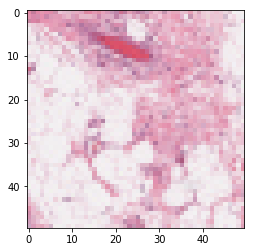

In [299]:
import cv2
import matplotlib.pyplot as plt
def view_images(image):
    image_cv = cv2.imread(image)
    plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
view_images(Data[52])

> ***Code Conclusion :*** We can see that images are very small, though they are cropped images, its hard for human eye to understand them without using some high costly machines. 

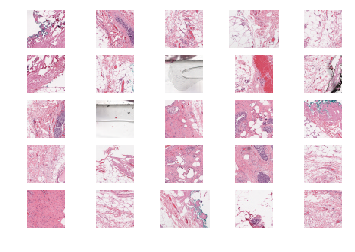

In [300]:
def plot_images(photos) :
    x=0
    for image in photos:
        image_cv = cv2.imread(image)
        plt.subplot(5, 5, x+1)
        plt.imshow(cv2.cvtColor(image_cv, cv2.COLOR_BGR2RGB));
        plt.axis('off');
        x+=1
plot_images(Data[:25])

Now lets look at the color ranges that our images have

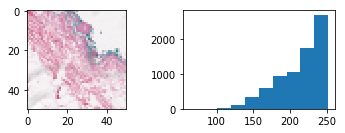

In [301]:
def hist_plot(image):
    img = cv2.imread(image)
    plt.subplot(2, 2,1)
    view_images(image)
    plt.subplot(2, 2,2)
    plt.hist(img.ravel()) 
hist_plot(Data[29])
    

> ***Code Conclusion :*** From the above image we can conclude that brighter region is more than the darken region in our image.  

Next step is we need to extract the class names in which each files belong from its file names. We will save it in output.csv file.

In [302]:
from tqdm import tqdm
import csv
Data_output=list()
Data_output.append(["Classes"])
for file_name in tqdm(Data):
    Data_output.append([file_name[-10:-4]])
with open("output.csv", "w") as f:
    writer = csv.writer(f)
    for val in Data_output:
        writer.writerows([val])

100%|██████████| 277524/277524 [00:00<00:00, 485810.94it/s]


Below code reads the data from output.csv and displays it

In [303]:
from IPython.display import display # Allows the use of display() for DataFrames
data_output = pd.read_csv("output.csv")
display(data_output.head(5))
print(data_output.shape)

,Classes
0,class0
1,class0
2,class0
3,class0
4,class0


(277524, 1)


> *Class1* represents** IDC(+)** and* Class0* represents** IDC(-)**

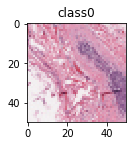

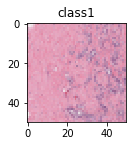

In [304]:
def class_output(images,x,i):
    fig = plt.figure()
    ax = plt.subplot(2, 2,i)
    ax.set_title(data_output.loc[x].item())
    view_images(images)
    i+=1
    return
k=0 #we have to show only one image of class0 therefore this variable is to check that
l=0 #we have to show only one image of class1 therefore this variable to check that
i=0 #for subplot position
for x in range(1,len(Data)):
    if(data_output.loc[x].item()=="class0" and k!=1):
        k+=1
        i+=1
        class_output(Data[x],x,i)
    elif(data_output.loc[x].item()=="class1" and l!=1):
        l+=1
        i+=1
        class_output(Data[x],x,i)
    elif(k==0 or l==0):
        continue
    else:
        break

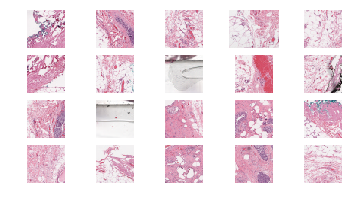

In [305]:
def vis_data(photos,a) :
    x=0
    beta=0
    for image in photos:
        image_cv = cv2.imread(image)
        fig=plt.figure(figsize=(50,50))
        ax=plt.subplot(2, 5, x+1)
        view_images(images)
        x+=1
        beta+=1
plot_images(Data[0:20])

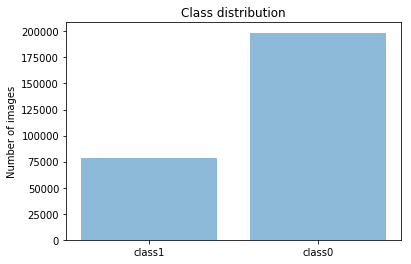

In [306]:
class1 = data_output[(data_output["Classes"]=="class1" )].shape[0]
class0 = data_output[(data_output["Classes"]=="class0" )].shape[0]
objects=["class1","class0"]
y_pos = np.arange(len(objects))
count=[class1,class0]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of images')
plt.title('Class distribution')
 
plt.show()

> ***Code Conclusion :*** We can see that we have an unbalanced class and which is a common problem when we have medical data, therefore this is one another problem that we have to deal with later.

In [307]:
percent_class1=class1/len(Data)
percent_class0=class0/len(Data)
print("Total Class1 images :",class1)
print("Total Class0 images :",class0)
print("Percent of class 0 images : ", percent_class0*100)
print("Percent of class 1 images : ", percent_class1*100)

Total Class1 images : 78786
Total Class0 images : 198738
Percent of class 0 images :  71.61110390452717
Percent of class 1 images :  28.388896095472827


> ***Data Processing  *** 

We will first shuffle are images to remove any patterns if present and then load them.

In [308]:
from sklearn.utils import shuffle
Data,data_output= shuffle(Data,data_output)

In [309]:
from tqdm import tqdm
data=list()
for img in tqdm(Data):
    image_ar = cv2.imread(img)
    data.append(cv2.resize(image_ar,(50,50),interpolation=cv2.INTER_CUBIC))

100%|██████████| 277524/277524 [03:19<00:00, 1394.32it/s]


We would encode our output data which is present as Class1 and Class0 to 1 and 0.

In [310]:
data_output=data_output.replace(to_replace="class0",value=0)
data_output=data_output.replace(to_replace="class1",value=1)

In the next step we will OneHot encode our data to better work with neural networks.

In [311]:
from keras.utils import to_categorical
data_output_encoded =to_categorical(data_output, num_classes=2)
print(data_output_encoded.shape)

(277524, 2)


Now we will split our data into training set and testing set.

In [312]:
from sklearn.model_selection import train_test_split
data=np.array(data)
X_train, X_test, Y_train, Y_test = train_test_split(data, data_output_encoded, test_size=0.3)
print("Number of train files",len(X_train))
print("Number of test files",len(X_test))
print("Number of train_target files",len(Y_train))
print("Number of  test_target  files",len(Y_test))

Number of train files 194266
Number of test files 83258
Number of train_target files 194266
Number of  test_target  files 83258


We have a large dataset and we will work with neural networks, therefore for better debugging we will use only a part of data, considering limited RAM and non GPU processor, this will not cost us much as we would also be using under sampling methods and image argumentation to deal with class imbalances and moderate data.

In [313]:
X_train=X_train[0:70000]
Y_train=Y_train[0:70000]
X_test=X_test[0:30000]
Y_test=Y_test[0:30000]

We will now do undersampling, to treat our data for class imbalances. The Code inspiration is taken from a notebook - https://www.kaggle.com/paultimothymooney/predict-idc-in-breast-cancer-histology-images

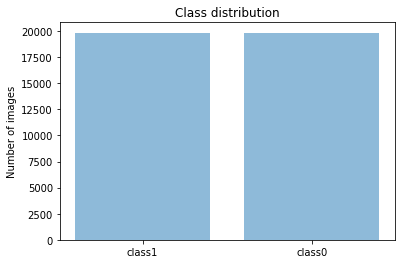

In [314]:
from keras.utils import to_categorical
from imblearn.under_sampling import RandomUnderSampler

X_train_shape = X_train.shape[1]*X_train.shape[2]*X_train.shape[3]
X_test_shape = X_test.shape[1]*X_test.shape[2]*X_test.shape[3]
X_train_Flat = X_train.reshape(X_train.shape[0], X_train_shape)
X_test_Flat = X_test.reshape(X_test.shape[0], X_test_shape)

random_US = RandomUnderSampler(ratio='auto')
X_train_RUS, Y_train_RUS = random_US.fit_sample(X_train_Flat, Y_train)
X_test_RUS, Y_test_RUS = random_US.fit_sample(X_test_Flat, Y_test)
del(X_train_Flat,X_test_Flat)

class1=1
class0=0

for i in range(0,len(Y_train_RUS)): 
    if(Y_train_RUS[i]==1):
        class1+=1
for i in range(0,len(Y_train_RUS)): 
    if(Y_train_RUS[i]==0):
        class0+=1
classes=["class1","class0"]
y_pos = np.arange(len(classes))
count=[class1,class0]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of images')
plt.title('Class distribution')
 
plt.show()



Y_train_encoded = to_categorical(Y_train_RUS, num_classes = 2)
Y_test_encoded = to_categorical(Y_test_RUS, num_classes = 2)

del(Y_train_RUS,Y_test_RUS)

for i in range(len(X_train_RUS)):
    X_train_RUS_Reshaped = X_train_RUS.reshape(len(X_train_RUS),50,50,3)
del(X_train_RUS)

for i in range(len(X_test_RUS)):
    X_test_RUS_Reshaped = X_test_RUS.reshape(len(X_test_RUS),50,50,3)
del(X_test_RUS)


We also need a validation set inorder to check overfitting. We can do two things either split test set further into valid set or split train se into valid set.

We will go for spliting testing set into validation set.

In [315]:
X_test, X_valid, Y_test, Y_valid = train_test_split(X_test_RUS_Reshaped, Y_test_encoded, test_size=0.2,shuffle=True)

In [316]:
print("Number of train files",len(X_train_RUS_Reshaped))
print("Number of valid files",len(X_valid))
print("Number of train_target files",len(Y_train_encoded))
print("Number of  valid_target  files",len(Y_valid))
print("Number of test files",len(X_test))
print("Number of  test_target  files",len(Y_test))

Number of train files 39702
Number of valid files 3382
Number of train_target files 39702
Number of  valid_target  files 3382
Number of test files 13528
Number of  test_target  files 13528


In [317]:
from sklearn.utils import shuffle
X_train,Y_train= shuffle(X_train_RUS_Reshaped,Y_train_encoded)

> We need to now preprocess our image file. We change pixels range from 0-255 to 0-1.

In [318]:
display(Y_train_encoded.shape)
display(Y_test.shape)
display(Y_valid.shape)

(39702, 2)

(13528, 2)

(3382, 2)

In [319]:
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_valid.shape)
print("Testing Data Shape:", X_test.shape)
print("Training Label Data Shape:", Y_train.shape)
print("Validation Label Data Shape:", Y_valid.shape)
print("Testing Label Data Shape:", Y_test.shape)

Training Data Shape: (39702, 50, 50, 3)
Validation Data Shape: (3382, 50, 50, 3)
Testing Data Shape: (13528, 50, 50, 3)
Training Label Data Shape: (39702, 2)
Validation Label Data Shape: (3382, 2)
Testing Label Data Shape: (13528, 2)


Now we have our three sets of train, valid and test. We will now create our benchmark model.

In [320]:
import itertools
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

> ***BENCHMARK MODEL: *** A simple CNN model

In [321]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),strides=2,padding='same',activation='relu',input_shape=(50,50,3)))
model.add(Flatten())
model.add(Dense(2, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 25, 25, 32)        896       
_________________________________________________________________
flatten_2 (Flatten)          (None, 20000)             0         
_________________________________________________________________
dense_63 (Dense)             (None, 2)                 40002     
Total params: 40,898
Trainable params: 40,898
Non-trainable params: 0
_________________________________________________________________


In [322]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [323]:
from keras.callbacks import ModelCheckpoint  
checkpointer = ModelCheckpoint(filepath='weights.best.cnn.hdf5', 
                               verbose=1, save_best_only=True)
model.fit(X_train, Y_train, 
          validation_data=(X_valid, Y_valid),
          epochs=3, batch_size=128, callbacks=[checkpointer], verbose=2,shuffle=True)

Train on 39702 samples, validate on 3382 samples
Epoch 1/3
 - 5s - loss: 8.0431 - acc: 0.5010 - val_loss: 8.2211 - val_acc: 0.4899

Epoch 00001: val_loss improved from inf to 8.22109, saving model to weights.best.cnn.hdf5
Epoch 2/3
 - 4s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.2211 - val_acc: 0.4899

Epoch 00002: val_loss did not improve from 8.22109
Epoch 3/3
 - 4s - loss: 8.0590 - acc: 0.5000 - val_loss: 8.2211 - val_acc: 0.4899

Epoch 00003: val_loss did not improve from 8.22109


In [324]:
model.load_weights('weights.best.cnn.hdf5')

In [325]:
predictions = [np.argmax(model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test)]

100%|██████████| 13528/13528 [00:23<00:00, 584.18it/s]


> ***Now we will plot the confusion matrix :***

[[   0 6730]
 [   0 6798]]


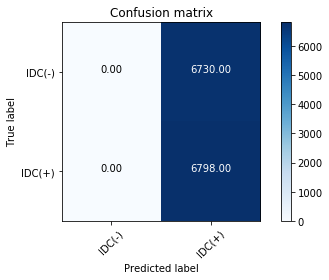

In [326]:
from sklearn.metrics import confusion_matrix
class_names=['IDC(-)','IDC(+)']
cnf_matrix_bench=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions))
plot_confusion_matrix(cnf_matrix_bench, classes=class_names,
                      title='Confusion matrix')


***Image Argumentation***

We will now add image argumentation to our data, so that it may be set for wider range of domain

We will also rescale our image pixels, from range of 0-255.0 to 0-1.

In [327]:
from keras.preprocessing.image import ImageDataGenerator 
datagen = ImageDataGenerator(
        shear_range=0.2,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        rescale=1/255.0,
        horizontal_flip=True,
        vertical_flip=True)

In [328]:
X_valid_e=X_valid/255.0
X_test_e=X_test/255.0

In [329]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

argum_model = Sequential()
argum_model.add(GlobalAveragePooling2D(input_shape=X_train.shape[1:]))
argum_model.add(Dense(32,activation='relu'))
argum_model.add(Dropout(0.1))
argum_model.add(Dense(64,activation='relu'))
argum_model.add(Dropout(0.15))
argum_model.add(Dense(2, activation='softmax'))
argum_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_15  (None, 3)                 0         
_________________________________________________________________
dense_64 (Dense)             (None, 32)                128       
_________________________________________________________________
dropout_48 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_65 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_49 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_66 (Dense)             (None, 2)                 130       
Total params: 2,370
Trainable params: 2,370
Non-trainable params: 0
_________________________________________________________________


In [330]:
argum_model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

In [331]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.bestarg.hdf5', verbose=1, save_best_only=True)

In [332]:
batch_size=32
epochs=5
argum_model.fit_generator(datagen.flow(X_train, Y_train, batch_size), 
          validation_data=(X_valid_e, Y_valid), steps_per_epoch=len(X_train) / batch_size,
          epochs=epochs,callbacks=[checkpointer], verbose=0)


Epoch 00001: val_loss improved from inf to 0.46814, saving model to weights.bestarg.hdf5

Epoch 00002: val_loss improved from 0.46814 to 0.46502, saving model to weights.bestarg.hdf5

Epoch 00003: val_loss improved from 0.46502 to 0.45496, saving model to weights.bestarg.hdf5

Epoch 00004: val_loss did not improve from 0.45496

Epoch 00005: val_loss improved from 0.45496 to 0.45415, saving model to weights.bestarg.hdf5


In [333]:
argum_model.load_weights('weights.bestarg.hdf5')

In [334]:
predictions_arg = [np.argmax(argum_model.predict(np.expand_dims(feature, axis=0))) for feature in tqdm(X_test_e)]

100%|██████████| 13528/13528 [00:18<00:00, 721.40it/s]


> ***Now we will plot the confusion matrix :***

[[5281 1449]
 [1364 5434]]


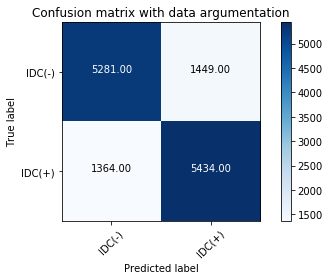

In [335]:
from sklearn.metrics import confusion_matrix
class_names=['IDC(-)','IDC(+)']
cnf_matrix_Arg=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions_arg))
plot_confusion_matrix(cnf_matrix_Arg, classes=class_names,
                      title='Confusion matrix with data argumentation')

**Transfer Learning**

We will now add transfer learning from various models

In [336]:
from keras.applications.vgg19 import VGG19
arg_model = VGG19(include_top=False,weights='imagenet',input_shape=(50,50,3))

In [337]:
from keras.applications.vgg19 import preprocess_input
bottleneck_train=arg_model.predict(preprocess_input(X_train),batch_size=50,verbose=1)

39702/39702 [==============================] - 40s 1ms/step


In [338]:
from keras.applications.vgg19 import preprocess_input
bottleneck_valid=arg_model.predict(preprocess_input(X_valid),batch_size=50,verbose=1)

3382/3382 [==============================] - 4s 1ms/step


In [339]:
from keras.applications.vgg19 import preprocess_input
bottleneck_test=arg_model.predict(preprocess_input(X_test),batch_size=50,verbose=1)

13528/13528 [==============================] - 14s 999us/step


In [340]:
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Dropout, Flatten, Dense
from keras.models import Sequential

model_transfer = Sequential()
model_transfer.add(GlobalAveragePooling2D(input_shape=bottleneck_train.shape[1:]))
model_transfer.add(Dense(32,activation='relu'))
model_transfer.add(Dropout(0.1))
model_transfer.add(Dense(64,activation='relu'))
model_transfer.add(Dropout(0.15))

model_transfer.add(Dense(2, activation='softmax'))

model_transfer.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_16  (None, 512)               0         
_________________________________________________________________
dense_67 (Dense)             (None, 32)                16416     
_________________________________________________________________
dropout_50 (Dropout)         (None, 32)                0         
_________________________________________________________________
dense_68 (Dense)             (None, 64)                2112      
_________________________________________________________________
dropout_51 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_69 (Dense)             (None, 2)                 130       
Total params: 18,658
Trainable params: 18,658
Non-trainable params: 0
_________________________________________________________________


In [341]:
model_transfer.compile(loss='categorical_crossentropy', optimizer='AdaDelta', metrics=['accuracy'])

In [342]:
from keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint(filepath='weights.bestarg.tranfer.hdf5', verbose=1, save_best_only=True)

In [343]:
batch_size=32
epochs=20
model_transfer.fit(bottleneck_train, Y_train, batch_size,
          validation_data=(bottleneck_valid, Y_valid),
          epochs=epochs,callbacks=[checkpointer], verbose=1)

Train on 39702 samples, validate on 3382 samples
Epoch 1/20
39702/39702 [==============================] - 8s 211us/step - loss: 0.6168 - acc: 0.7496 - val_loss: 0.4637 - val_acc: 0.7945

Epoch 00001: val_loss improved from inf to 0.46367, saving model to weights.bestarg.tranfer.hdf5
Epoch 2/20
39702/39702 [==============================] - 7s 173us/step - loss: 0.4672 - acc: 0.7885 - val_loss: 0.4638 - val_acc: 0.7966

Epoch 00002: val_loss did not improve from 0.46367
Epoch 3/20
39702/39702 [==============================] - 7s 173us/step - loss: 0.4533 - acc: 0.7971 - val_loss: 0.4529 - val_acc: 0.8046

Epoch 00003: val_loss improved from 0.46367 to 0.45294, saving model to weights.bestarg.tranfer.hdf5
Epoch 4/20
39702/39702 [==============================] - 7s 173us/step - loss: 0.4452 - acc: 0.8014 - val_loss: 0.4555 - val_acc: 0.7995

Epoch 00004: val_loss did not improve from 0.45294
Epoch 5/20
39702/39702 [==============================] - 7s 172us/step - loss: 0.4397 - acc: 0

In [344]:
model_transfer.load_weights('weights.bestarg.tranfer.hdf5')

In [345]:
predictions_transfer = [np.argmax(model_transfer.predict(np.expand_dims(feature, axis=0))) for feature in bottleneck_test]

> ***Now we will plot the confusion matrix :***

[[5374 1356]
 [1321 5477]]


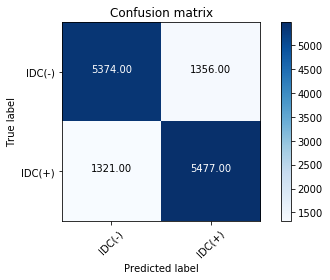

In [346]:
from sklearn.metrics import confusion_matrix
class_names=['IDC(-)','IDC(+)']
cnf_matrix_transfer=confusion_matrix(np.argmax(Y_test, axis=1), np.array(predictions_transfer))
plot_confusion_matrix(cnf_matrix_transfer, classes=class_names,
                      title='Confusion matrix')

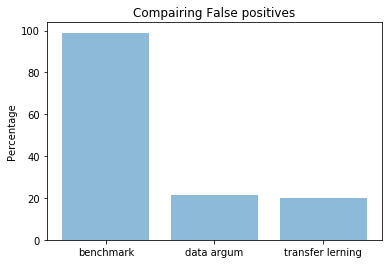

In [347]:
tp=0
for i in range(0,len(Y_test)): 
    if(np.argmax(Y_test[i])==1):
        tp+=1
confusion_bench=cnf_matrix_bench[0][1]/tp *100
confusion_Arg=cnf_matrix_Arg[0][1]/tp *100
confusion_transfer=cnf_matrix_transfer[0][1]/tp *100
classes=["benchmark","data argum","transfer lerning"]
objects=["benchmark","data argum","transfer lerning"]
y_pos = np.arange(len(classes))
count=[confusion_bench,confusion_Arg,confusion_transfer]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Compairing False positives')

plt.show()


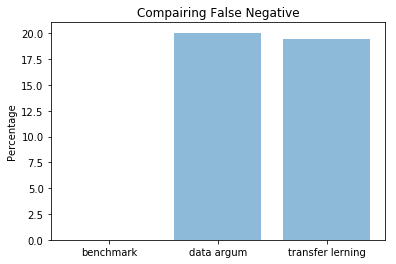

In [348]:
tp=0
for i in range(0,len(Y_test)): 
    if(np.argmax(Y_test[i])==1):
        tp+=1
confusion_bench=cnf_matrix_bench[1][0]/tp *100
confusion_Arg=cnf_matrix_Arg[1][0]/tp *100
confusion_transfer=cnf_matrix_transfer[1][0]/tp *100
classes=["benchmark","data argum","transfer lerning"]
objects=["benchmark","data argum","transfer lerning"]
y_pos = np.arange(len(classes))
count=[confusion_bench,confusion_Arg,confusion_transfer]
plt.bar(y_pos, count, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Percentage')
plt.title('Compairing False Negative')

plt.show()


Algorithm for passing a new image and predicting whether it has breast cancer or not.

In [349]:
def predict(image):
    bottleneck_image=arg_model.predict(preprocess_input(np.expand_dims(image,axis=0)))
    predictions_transfer = [np.argmax(model_transfer.predict((bottleneck_image)))]
    if(predictions_transfer==1):
        print('IDC DETECTED ')
    else:
        print('IDC Negative')

IDC Negative
Actual :  ['IDC+']


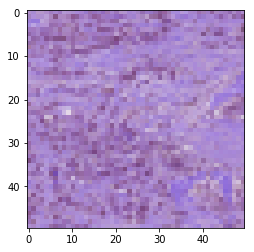

In [350]:
predict(X_train[250])
img = Image.fromarray(X_train[250])
class_a=['IDC+' if np.argmax(Y_train[250])==1 else 'IDC-']
print('Actual : ',class_a)
plt.imshow(img)

IDC Negative
Actual :  ['IDC-']


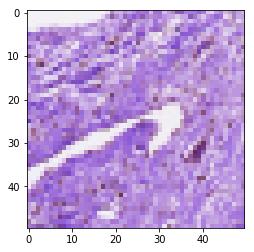

In [352]:
predict(X_train[215])
img = Image.fromarray(X_train[215])
class_a=['IDC+' if np.argmax(Y_train[215])==1 else 'IDC-']
print('Actual : ',class_a)
plt.imshow(img)